#<b> <font size =14>A Detailed Exploration of the Built-in Titanic Dataset Through Visualizations</font> </b>

In [1]:
#Importing Necessary Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

#<b> Load the built-in data set</b>

In [2]:
#loading built-in titanicdataset from seaborn
df=sns.load_dataset('titanic')

In [3]:
#getting a quick view
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#<b>Understanding the features<br>
## This built-in Seaborn dataset has duplicate features for convenience: full-name versions are easier to read, while single-character versions are better for modeling and converting into numerical values.
## <br> This data set has 3 pairs of features that are duplicate, which are :
## <br>I. <b>pclass</b> - numerical version(1/2/3)</br> <b>class</b>-categorical version(first/Second/Third)<br><br>II. <b>suvived</b>-numerical value (0/1) <br><b>alive</b>-categorical version(no/yes)<br><br> III.<b> embarked</b>- character version (S/C/Q)<br><b>embark_town</b>- text version (Southampton/Cherbourg/Queenstown)
</b>

##<b>sex</b>-Male/Female-categorical<br><b>who</b>-man/woman/child-categorical<br><br><b>adult_male</b>-True/False -Categorical boolean<br><b>alone</b>-True/False-categorical boolean<br><b>sibsp</b>-number of siblings/spouses -numerical<br><b>parch</b>-number of parents/children-numerical<br><b>age</b>-numerical<br><b>fare</b>-ticket price-numerical<br><b>deck</b>-level of decks-categorical<br><b>alive</b>-True/False- Categrical boolean

##<b><u>Additional informations about features:</u><b>The 'who' feature describes whether the passenger was a man, woman, or child, while the 'adult_male' feature indicates only whether the passenger was an adult male (True/False). Both of these features are derived from 'age' and 'sex' to simplify survival prediction. On the Titanic, survival chances were strongly influenced by 'gender' and 'age', as women and children were given priority for lifeboats.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#separating columns by their data types
numerical_features=df.select_dtypes(include='number').columns.to_list()
categorical_features=df.select_dtypes(exclude=['number','bool']).columns.to_list()
boolean_features=df.select_dtypes(include='bool').columns.to_list()

In [6]:
numerical_features,categorical_features,boolean_features

(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'],
 ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'],
 ['adult_male', 'alone'])

In [7]:
# checking null values
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


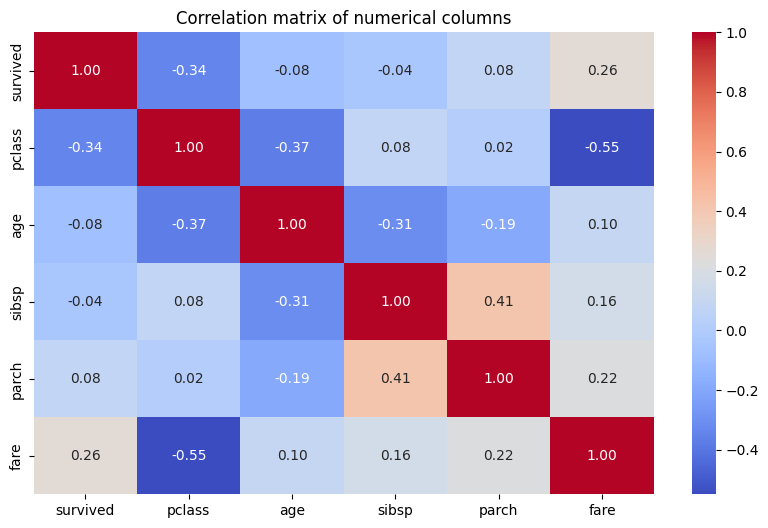

In [9]:
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['float','int']).corr(),annot=True,cmap='coolwarm',ax=ax,fmt='.2f')
plt.title('Correlation matrix of numerical columns')
plt.show()

##<b>Correlation shows how features relate to each other. Fare and class have a correlation of -0.55, meaning higher classes paid higher fares, and as class number increases, fare generally decreases. Siblings/spouses and parents/children have a correlation of 0.48, showing a moderate positive link. The relationship between fare and age is close to 0, indicating almost no connection.<br>Looking at how features affect survival, class has a correlation of -0.34 with survival, meaning as class goes from first to third, the chance of survival decreases. Fare has a correlation of 0.26, showing that passengers who paid higher fares were slightly more likely to survive. Age and parents/children have correlations of -0.08, and siblings/spouses has -0.04, indicating these features have very little effect on survival.




#<b> Survival counts/rates analysis</b>

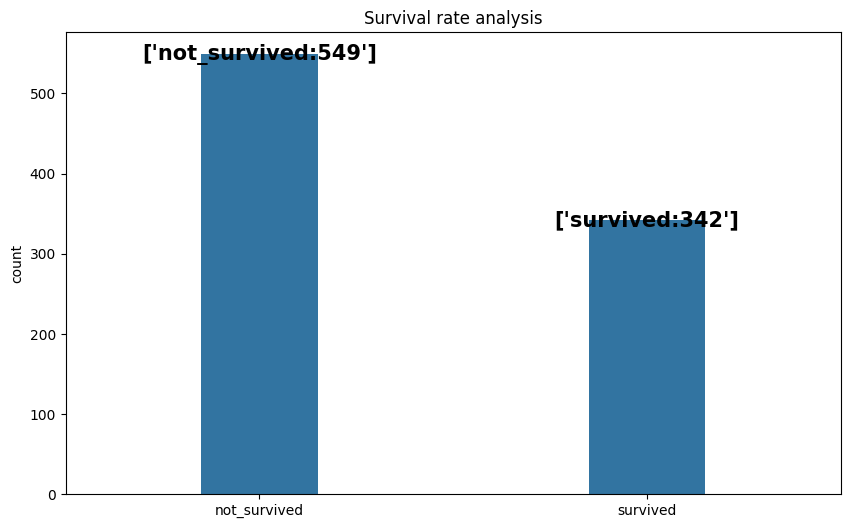

In [10]:
title=['not_survived','survived']
fig,ax=plt.subplots(figsize=(10,6))
ploting=sns.countplot(x='survived',data=df,width=0.3)
for patch,label in zip(ploting.patches,title):
  counts=int(patch.get_height())
  labels=[f'{label}:{counts}']
  ax.annotate(labels,xy=(patch.get_x()+patch.get_width()/2,patch.get_height()),ha='center',va='center',fontsize=15,fontweight='bold')
plt.title('Survival rate analysis')
ax.set_xticklabels(title)
ax.set_xlabel('')
plt.show()

In [11]:
len(df)

891

In [12]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


##<b>Majority did not survive:</b>The plot implying that more passengers lost their lives than survived.<br><b>Survival rate : </b>Around 38% survived (342 out of 891 total), while about 62% did not survive.<br><b>Imbalanced outcome : </b>The dataset has a moderate imbalance between the two classes, which is important to remember when building classification models.<br><b>Visual contrast : </b>The difference between the two bars is visible but not extreme, which indicates that while survival was harder, it wasn not impossible. <br><b>Implication :</b>Any further analysis (like by class, gender, or age) should consider this baseline survival imbalance.

##<b> Survival Analysis by 'gender'

In [13]:
# proprotion on gender
df['sex'].value_counts(normalize=True)*100

,proportion
sex,
male,64.758698
female,35.241302


In [14]:
survive_gender=df.groupby('survived')['sex'].value_counts().reset_index()
survive_gender

,survived,sex,count
0,0,male,468
1,0,female,81
2,1,female,233
3,1,male,109


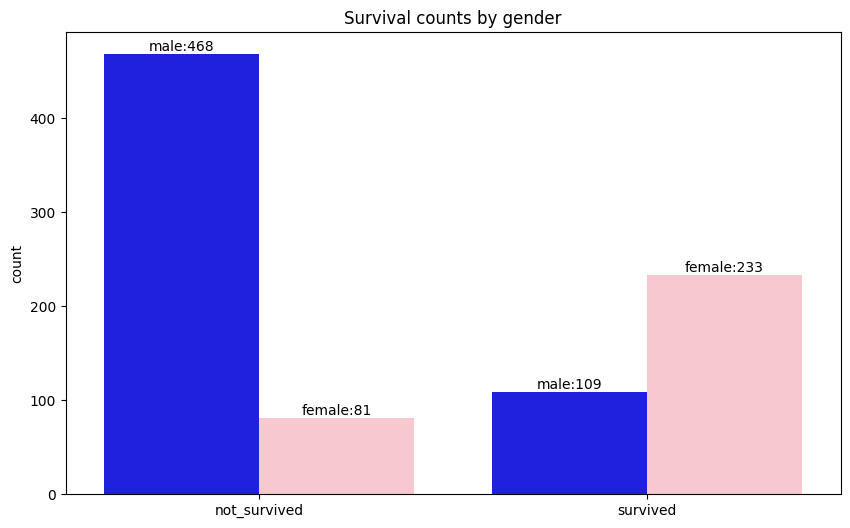

In [15]:
fig,ax=plt.subplots(figsize=(10,6))
colours={'male':'blue','female':'pink'}
bars=sns.barplot(x='survived',y='count',data=survive_gender,hue='sex',palette=colours)
for container,label in zip(bars.containers,['male','female']):
  counts=[int(p.get_height()) for p in container]
  labels=[f'{label}:{count}' for count in counts]
  bars.bar_label(container,labels=labels,label_type='edge')
ax.set_xticklabels(title)
plt.title('Survival counts by gender')
ax.legend_.remove()
ax.set_xlabel('')
plt.show()

##<b>Out of the total passengers, 64.76% were male and 35.24% were female, including children. A higher proportion of female passengers survived compared to male passengers. Some female passengers did not survive, possibly because they were in lower passenger classes and their decks were far away from the life boats.

##The following cells contain code to support the observations described above.

In [16]:
df[df['sex']=='female']['survived'].value_counts(normalize=True)*100# female survived/non-survived proportions

,proportion
survived,
1,74.203822
0,25.796178


In [17]:
(df[(df['sex']=='female') & (df['survived']==0)]['pclass'].value_counts(normalize=True)*100).round(2)# non-survived female proportion for each classes

,proportion
pclass,
3,88.89
2,7.41
1,3.70


##The majority of female passengers who did not survive may have been in 3rd class, where the decks were farther away from the lifeboats. A smaller number of 1st and 2nd class female passengers also did not survive, likely due to circumstances such as their location on the ship or other situational factors affecting evacuation

In [18]:
df[(df['sex']=='male') & (df['survived']==1)]['pclass'].value_counts()

,count
pclass,
3,47
1,45
2,17



## cannot recreate the exact situations each passenger faced or what went through their minds during the disaster. However, the majority of surviving 3rd class male passengers were likely influenced by circumstances such as their location on the ship, which may have made access to lifeboats easier. It is also possible that some assisted during the evacuation or accompanied higher-class passengers toward safety. These are only assumptions to help explain the observed higher survival rate of 3rd class male passangers among other classes males.


#<b> Detailed Analysis of Survival counts by Individulas('who')

In [19]:
survive_who=df.groupby('survived')['who'].value_counts().reset_index()
survive_who

,survived,who,count
0,0,man,449
1,0,woman,66
2,0,child,34
3,1,woman,205
4,1,man,88
5,1,child,49


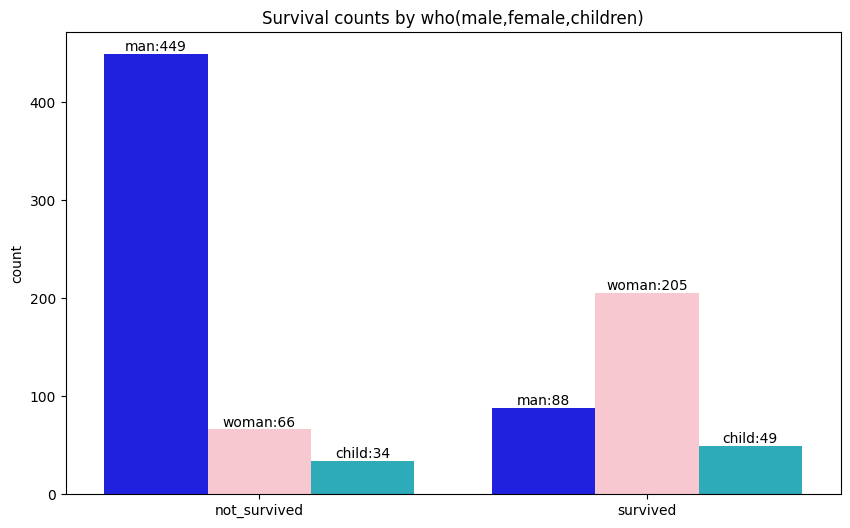

In [20]:
fig,ax=plt.subplots(figsize=(10,6))
colours={'man':'blue','woman':'pink','child':'#17becf'}
bars=sns.barplot(x='survived',y='count',data=survive_who,hue='who',palette=colours)
for container,label in zip(bars.containers,['man','woman','child']):
  counts=[int(p.get_height()) for p in container]
  labels=[f'{label}:{count}' for count in counts]
  bars.bar_label(container,labels=labels,label_type='edge')
plt.title('Survival counts by who(male,female,children)')
ax.set_xticklabels(title)
ax.legend_.remove()
ax.set_xlabel('')
plt.show()

##<b>The above countplot shows that the survival rate of children is above 50%, even though they were given priority to access lifeboats. One possible reason is that many of them may have been in 3rd class, where the decks were farther away from the lifeboats.

## The following cell code will support the above explaination

In [21]:
df[(df['who']=='child')]['pclass'].value_counts()## Total number of children from each classes

,count
pclass,
3,58
2,19
1,6


In [22]:
df[(df['survived']==0)&(df['who']=='child')]['pclass'].value_counts()# classes of non-survived children

,count
pclass,
3,33
1,1


##<b>Among children who did not survive, the majority were in 3rd class (33), while only 1 was in 1st class. This supports the point that location on the ship and class may have influenced their survival outcomes.

##<B> Survival rates/counts by passenger classes

In [23]:
survive_class=df.groupby('class').agg(survival_percent=pd.NamedAgg('survived',aggfunc=lambda x: round(x.mean()*100,2)),
                       total_survival=pd.NamedAgg('survived',aggfunc='sum'),
                        Total_passengers=pd.NamedAgg('class',aggfunc='count')).reset_index()



In [24]:
survive_class

,class,survival_percent,total_survival,Total_passengers
0,First,62.96,136,216
1,Second,47.28,87,184
2,Third,24.24,119,491


In [25]:
df.groupby(['class','alive'])['sex'].value_counts()# detailed counts of survival/non-survival passangers from all the classes

class   alive  sex   
First   no     male       77
               female      3
        yes    female     91
               male       45
Second  no     male       91
               female      6
        yes    female     70
               male       17
Third   no     male      300
               female     72
        yes    female     72
               male       47
Name: count, dtype: int64

In [26]:
df[(df['pclass']==3)&(df['sex']=='female')]['alive'].value_counts()# survived/non-survived female passengers from 3rd class

,count
alive,
yes,72
no,72


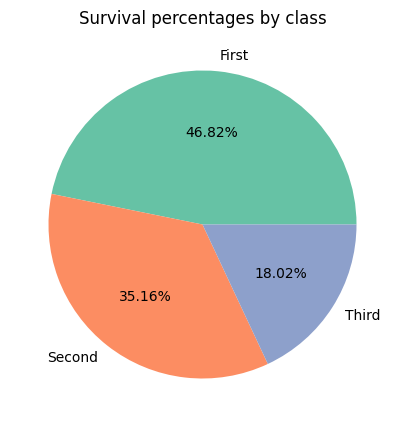

In [27]:
fig,ax=plt.subplots(figsize=(10,5))
colours= sns.color_palette("Set2", 3)
ax.pie(survive_class['survival_percent'],labels=['First','Second','Third'],autopct='%1.2f%%',colors=colours)
plt.title('Survival percentages by class')
plt.show()


##<b>Survival percentages are higher in 1st and 2nd class, largely because many female passengers from these classes survived, and there were fewer male passengers compared to 3rd class, where the number of male passangers were much higher. This contributed to the lower overall survival rate in 3rd class.

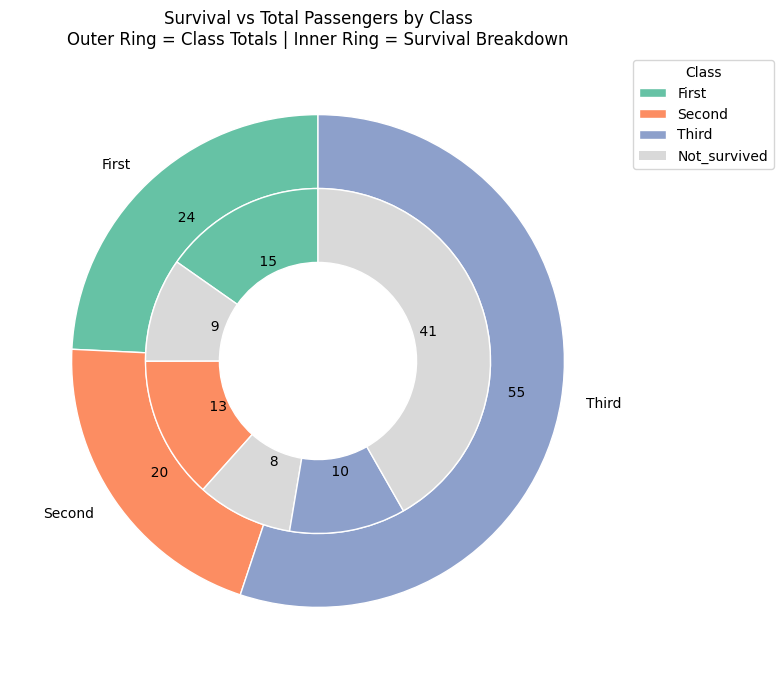

In [28]:
colours = sns.color_palette("Set2", 3)   # for classes
grey = ["#d9d9d9"]*3                     # faded for non-survivors

fig, ax = plt.subplots(figsize=(8,8))
inner=survive_class['total_survival'].to_numpy()
non_survive=(survive_class['Total_passengers']-survive_class['total_survival']).to_numpy()
inner_values=np.concatenate([inner,non_survive])
# Outer ring = total per class
outer=ax.pie(survive_class['Total_passengers'], labels=["First","Second","Third"],autopct='%4d', pctdistance=0.8,radius=1,colors=colours,startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
inner_colors = np.empty(inner.size * 2, dtype=object)
inner_colors[0::2] = colours      # survivors
inner_colors[1::2] = grey  # Inner ring = survivors vs non-survivors
inner=ax.pie(inner_values,
       colors=inner_colors,radius=0.7,
    pctdistance=0.65,startangle=90,autopct='%3d',
       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.legend(
    handles=list(outer[0]) + [Patch(facecolor="#d9d9d9", label='Not_survived')],
    title="Class",
    loc="upper left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.title("Survival vs Total Passengers by Class\nOuter Ring = Class Totals | Inner Ring = Survival Breakdown")
plt.show()

##<b>The majority of passengers were from 3rd class (55%), but only about 10% of them survived. In contrast, at least half of the passengers in the remaining two classes survived. This difference is likely influenced by the <font color='blue'>'women and children first' priority and the fact that 3rd class decks were farther from the lifeboats.</font>

##<b> Survival Counts By Port Of Boarding 'embark_town'

In [29]:
port_of_board=df.groupby('embark_town').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('embarked',aggfunc='count')

                                      ).reset_index()
port_of_board

,embark_town,Survived,Total_passenger
0,Cherbourg,93,168
1,Queenstown,30,77
2,Southampton,217,644


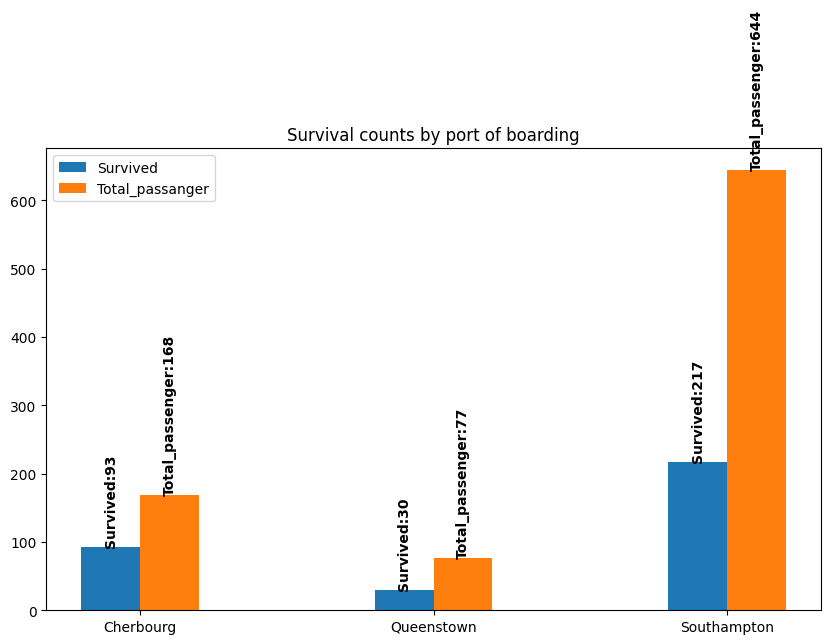

In [30]:
fig,ax=plt.subplots(figsize=(10,6))
width=0.2
port_name=['Cherbourg','Queenstown','Southampton']
x=np.arange(len(port_of_board['embark_town']))
sur_plot=ax.bar(x-width/2,height=port_of_board['Survived'],label='Survived',width=0.2)
tot_pass=ax.bar(x+width/2,height=port_of_board['Total_passenger'],label='Total_passanger',width=0.2)
for container,label in zip([sur_plot,tot_pass],['Survived','Total_passenger']):
  counts=[int(p.get_height()) for p in container]
  labels=[f'{label}:{count}' for count in counts]
  ax.bar_label(container,labels=labels,label_type='edge',rotation=90,fontsize=10,fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(port_name)
plt.title('Survival counts by port of boarding')
plt.legend()
plt.show()


##<b> Detailed Analysis by Each Port

##Southampton

In [31]:
s_passenger=df[df['embarked']=='S'][['class','survived']]# creating data frame for passengers who were boared at Southamption
s_passenger['class'].value_counts()

,count
class,
Third,353
Second,164
First,127


In [32]:
print(f'number of passengers boarded from southampton port were: {len(s_passenger)}')# number of passengers boarded from southampton


number of passengers boarded from southampton port were: 644


In [33]:
# passengers distribution by class boarded from southampton
s_pass_distri=s_passenger.groupby('class').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passengers=pd.NamedAgg('class',aggfunc='count'))
s_pass_distri

,Survived,Total_passengers
class,,
First,74,127
Second,76,164
Third,67,353


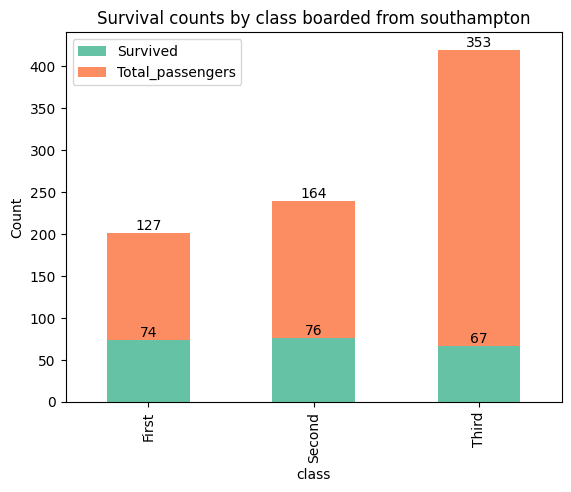

In [34]:
#fig,ax=plt.subplots(figsize=(10,6))
bars=s_pass_distri[['Survived','Total_passengers']].plot(kind='bar',stacked=True,color=['#66c2a5', '#fc8d62', '#8da0cb'])
for container in bars.containers:
  counts=[int(p.get_height()) for p in container]
  labels=[f'{count}' for count in counts]
  bars.bar_label(container,labels=labels,label_type='edge')
plt.title('Survival counts by class boarded from southampton')
plt.ylabel('Count')
plt.show()

##<b>First-class passengers had the highest likelihood of survival, with around 58% surviving the disaster. Second-class passengers experienced a moderate survival rate of about 46%, meaning nearly half of them survived. In contrast, third-class passengers had a significantly lower survival rate of only 19%, indicating that more than four out of five did not survive. This pattern highlights a strong relationship between social class and survival chances, suggesting that passengers in higher classes may have had better access to lifeboats and safety measures compared to those in lower classes.

##Cherbourg

In [35]:
c_passenger=df[df['embarked']=='C'][['class','survived']]# creating data frame for passengers who were boared at Cherbourg
c_passenger['class'].value_counts()

,count
class,
First,85
Third,66
Second,17


In [36]:
print(f'number of passengers boarded from Cherbourg port were: {len(c_passenger)}')

number of passengers boarded from Cherbourg port were: 168


In [37]:
# passengers distribution by class boarded from Cherbourg
c_pass_distri=c_passenger.groupby('class').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('class',aggfunc='count')).reset_index()
c_pass_distri

,class,Survived,Total_passenger
0,First,59,85
1,Second,9,17
2,Third,25,66


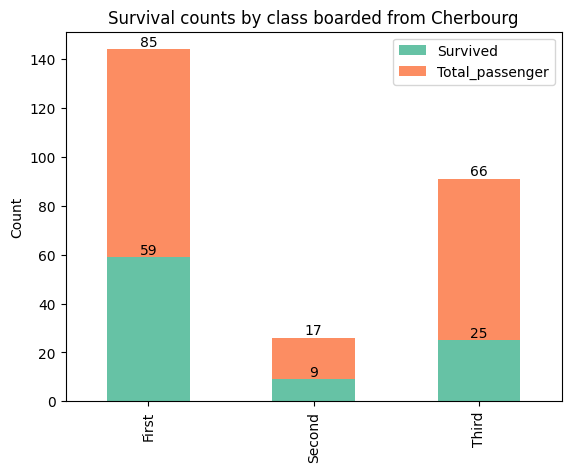

In [38]:
#fig,ax=plt.subplots(figsize=(10,6))
bars_c=c_pass_distri[['Survived','Total_passenger']].plot(kind='bar',stacked=True,color=['#66c2a5', '#fc8d62', '#8da0cb'])
for container in bars_c.containers:
  counts=[int(p.get_height()) for p in container]
  labels=[f'{count}' for count in counts]
  bars_c.bar_label(container,labels=labels,label_type='edge')
plt.title('Survival counts by class boarded from Cherbourg')
plt.ylabel('Count')
bars_c.set_xticklabels(['First','Second','Third'])
plt.show()

## Queenstown

In [39]:
q_passenger=df[df['embarked']=='Q'][['class','survived']]# creating data frame for passengers who were boared at Queenstown
q_passenger['class'].value_counts()

,count
class,
Third,72
Second,3
First,2


In [40]:
print(f'number of passengers boared from Queenstown port were :{len(q_passenger)}')

number of passengers boared from Queenstown port were :77


In [41]:
# passengers distribution by class boarded from Queenstown
q_pass_distri=q_passenger.groupby('class').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('class',aggfunc='count')).reset_index()
q_pass_distri

,class,Survived,Total_passenger
0,First,1,2
1,Second,2,3
2,Third,27,72


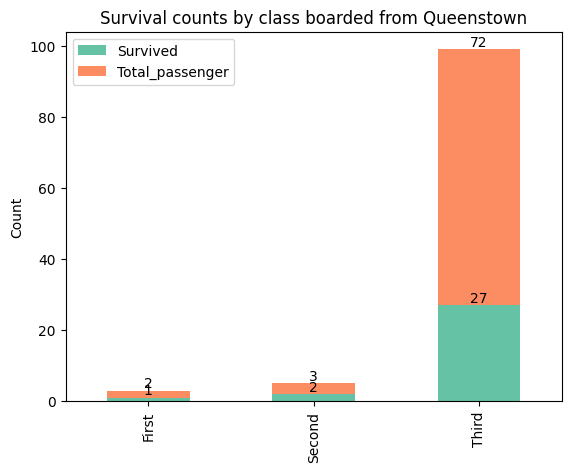

In [42]:
#fig,ax=plt.subplots(figsize=(10,6))
bars=q_pass_distri[['Survived','Total_passenger']].plot(kind='bar',stacked=True,color=['#66c2a5', '#fc8d62', '#8da0cb'])
for container in bars.containers:
  counts=[int(p.get_height()) for p in container]
  labels=[f'{count}' for count in counts]
  bars.bar_label(container,labels=labels,label_type='edge')
plt.title('Survival counts by class boarded from Queenstown')
plt.ylabel('Count')
bars.set_xticklabels(['First','Second','Third'])
plt.show()

##<b> Survival Analysis By 'deck' Before imputing nan Values

In [43]:
df.deck.value_counts() #checking for null values

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


##<b> Although there are 891 passengers in total, only 203 are shown when considering the 'Deck'feature due to NaN values.

In [44]:
print(f'Total number of rows which have null deck value are : {df.deck.isnull().sum().item()}')

Total number of rows which have null deck value are : 688


##<b>Out of 891 records, 688 have missing deck values. The rest are distributed as C 59, B 47, D 33, E 32, A 15, F 13, and G 4. When using value_counts(), pandas ignores NaNs, so these 688 missing values do not appear in the count. If the NaNs are replaced with "Unknown", these records become a new category. While this is fine for analysis or plotting, it creates an issue for KNN imputation because KNN treats "Unknown" as a valid value and will not attempt to impute it. For proper imputation, the missing deck values must remain as NaN.


##<b>I choose to keep the deck values as NaN for now and impute them later using KNN. KNN is a good choice because it predicts missing values based on the similarity between rows across other features. For the deck, passengers who have similar values for features like fare, class, age, or port of embarkation are likely to be in similar decks. KNN looks at the "nearest neighbors" for each missing value and chooses the most likely deck based on the patterns in the dataset. This makes the imputation data-driven and realistic, unlike filling missing decks with a fixed value or a generic label, which would ignore relationships between features

#<b> Effect Of Deck On Passenger Survival

In [45]:
deck_survival=df.groupby('deck').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count'))
deck_survival

,Survived,Total_passenger
deck,,
A,7,15
B,35,47
C,35,59
D,25,33
E,24,32
F,8,13
G,2,4


##<b> Effect of Deck and Gender on passanger survival

In [46]:
deck_gender=df.groupby(['deck','sex']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count')).reset_index()
deck_gender['Survival_percent']=round(deck_gender['Survived']/deck_gender['Total_passenger']*100,2)

deck_gender

,deck,sex,Survived,Total_passenger,Survival_percent
0,A,female,1,1,100.00
1,A,male,6,14,42.86
2,B,female,27,27,100.00
3,B,male,8,20,40.00
4,C,female,24,27,88.89
5,C,male,11,32,34.38
6,D,female,18,18,100.00
7,D,male,7,15,46.67
8,E,female,14,15,93.33
9,E,male,10,17,58.82


##<b> Survival Analysis on Deck and who

In [47]:
deck_who=df.groupby(['deck','who']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count')).reset_index()
deck_who

,deck,who,Survived,Total_passenger
0,A,child,1,1
1,A,man,5,13
2,A,woman,1,1
3,B,child,3,3
4,B,man,7,19
5,B,woman,25,25
6,C,child,1,2
7,C,man,10,31
8,C,woman,24,26
9,D,child,0,0


##<b> Survival Analysis on deck and adult_male

In [48]:
deck_adultmale=df.groupby(['deck','adult_male']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count')).reset_index()
deck_adultmale

,deck,adult_male,Survived,Total_passenger
0,A,False,2,2
1,A,True,5,13
2,B,False,28,28
3,B,True,7,19
4,C,False,25,28
5,C,True,10,31
6,D,False,18,18
7,D,True,7,15
8,E,False,15,16
9,E,True,9,16


##<b> Survival analysis on deck and passenger class

In [49]:
deck_class=df.groupby(['deck','class']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count')).reset_index()
deck_class

,deck,class,Survived,Total_passenger
0,A,First,7,15
1,A,Second,0,0
2,A,Third,0,0
3,B,First,35,47
4,B,Second,0,0
5,B,Third,0,0
6,C,First,35,59
7,C,Second,0,0
8,C,Third,0,0
9,D,First,22,29


In [50]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

##<b> Survival Analysis on deck and alone

In [51]:
deck_alone=df.groupby(['deck','alone']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck',aggfunc='count')).reset_index()
deck_alone

,deck,alone,Survived,Total_passenger
0,A,False,3,3
1,A,True,4,12
2,B,False,21,25
3,B,True,14,22
4,C,False,22,37
5,C,True,13,22
6,D,False,16,20
7,D,True,9,13
8,E,False,12,15
9,E,True,12,17


In [52]:
df['class'].isnull().sum()

np.int64(0)

In [53]:
df_copy=df.copy()

In [54]:
deck_null=df[df['deck'].isnull()].copy()##without deck

In [55]:
deck_null.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [56]:
deck_null.groupby(['embarked','class']).size().reset_index(name='Total_passenger')

,embarked,class,Total_passenger
0,C,First,19
1,C,Second,15
2,C,Third,65
3,Q,First,0
4,Q,Second,2
5,Q,Third,71
6,S,First,22
7,S,Second,151
8,S,Third,343


In [57]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#<b><font size=15>Deck imputation</font>


In [58]:
df_impute=df[['fare','pclass','adult_male','deck','sibsp','parch','alone','embarked']].copy()#Creating a new DataFrame with selected features for imputation

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
#Categorizing features by type
df_impute_cat=df_impute.select_dtypes(exclude='number').columns.to_list()
df_impute_num=df_impute.select_dtypes(include='number').columns.to_list()
df_impute_cat.remove('deck')

In [61]:
df_impute_cat,df_impute_num

(['adult_male', 'alone', 'embarked'], ['fare', 'pclass', 'sibsp', 'parch'])

In [62]:
sd_scale=StandardScaler()#for numerical features
le=LabelEncoder()#for categorical features

In [63]:
df_impute[df_impute_num]=sd_scale.fit_transform(df_impute[df_impute_num])
for col in df_impute_cat:# Encode categorical features one at a time
  df_impute[col]=le.fit_transform(df_impute[col])

In [64]:
#passenger counts per deck. There are
df_impute.deck.value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [65]:
df_impute['deck_encode']=np.nan#creating a feature with NaN values the same size as df and this feature will store the encoded deck values after applying fit and transform.

In [66]:
df_impute.loc[df_impute['deck'].notna(),'deck_encode']=le.fit_transform(df_impute.loc[df_impute['deck'].notna(),'deck'])#Only rows where 'deck' is not NaN are transformed to avoid affecting missing values

In [67]:
df_impute.deck_encode.value_counts()

,count
deck_encode,
2.0,59
1.0,47
3.0,33
4.0,32
0.0,15
5.0,13
6.0,4


In [68]:
df_impute.head()

,fare,pclass,adult_male,deck,sibsp,parch,alone,embarked,deck_encode
0,-0.502445,0.827377,1,NaN,0.432793,-0.473674,0,2,NaN
1,0.786845,-1.566107,0,C,0.432793,-0.473674,0,0,2.0
2,-0.488854,0.827377,0,NaN,-0.474545,-0.473674,1,2,NaN
3,0.420730,-1.566107,0,C,0.432793,-0.473674,0,2,2.0
4,-0.486337,0.827377,1,NaN,-0.474545,-0.473674,1,2,NaN


In [69]:
knn_features=df_impute_cat+df_impute_num
knn_features

['adult_male', 'alone', 'embarked', 'fare', 'pclass', 'sibsp', 'parch']

In [70]:
knn_imputer=KNNImputer(n_neighbors=5)
df_impute['deck_encode']=knn_imputer.fit_transform(df_impute[knn_features+['deck_encode']])[:,-1].round().astype('int')# Impute missing 'deck_encode' values using KNN, keeping existing values unchanged

In [71]:
df_impute.head()

,fare,pclass,adult_male,deck,sibsp,parch,alone,embarked,deck_encode
0,-0.502445,0.827377,1,NaN,0.432793,-0.473674,0,2,5
1,0.786845,-1.566107,0,C,0.432793,-0.473674,0,0,2
2,-0.488854,0.827377,0,NaN,-0.474545,-0.473674,1,2,5
3,0.420730,-1.566107,0,C,0.432793,-0.473674,0,2,2
4,-0.486337,0.827377,1,NaN,-0.474545,-0.473674,1,2,5


In [72]:
print('Displaying unique values in deck including NaN')
df.deck.unique()

Displaying unique values in deck including NaN


[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [73]:
print('Displaying unique values in deck_ecoded-shows no NaA values')
df_impute.deck_encode.unique()#

Displaying unique values in deck_ecoded-shows no NaA values


array([5, 2, 4, 6, 3, 0, 1])

In [74]:
df_impute.deck_encode.round().astype('int').unique()

array([5, 2, 4, 6, 3, 0, 1])

#<b> Deck Description

In [75]:
df_impute.deck_encode=le.inverse_transform(df_impute.deck_encode)#converting integer values back to labels

In [76]:
df.deck.value_counts()#before imputation Deck counts

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [77]:
df_impute.deck_encode.value_counts()#After imputation Deck counts

,count
deck_encode,
F,450
E,199
C,100
D,64
B,55
A,17
G,6


In [78]:
print("Check for remaining missing values in the DataFrame -ignore 'deck' since it is replaced by 'deck_encode'")
df_impute.isnull().sum()

Check for remaining missing values in the DataFrame -ignore 'deck' since it is replaced by 'deck_encode'


,0
fare,0
pclass,0
adult_male,0
deck,688
sibsp,0
parch,0
alone,0
embarked,0
deck_encode,0


In [79]:
df['deck_encode']=df_impute['deck_encode'].copy()# deep copy to original df

# <b> Survival Counts Analysis by 'deck' - After KNN Imputation

##<b> Effect Of Deck On Passenger Survival

In [80]:
deck_survival_imputed=df.groupby('deck_encode').agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count'))
deck_survival_imputed

,Survived,Total_passenger
deck_encode,,
A,7,17
B,38,55
C,52,100
D,35,64
E,81,199
F,127,450
G,2,6


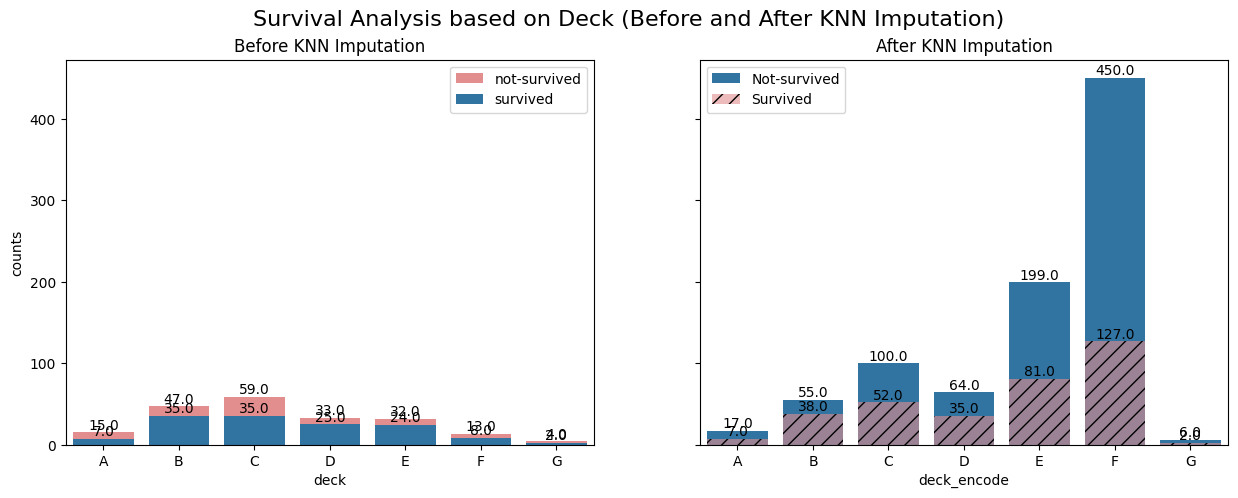

In [81]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x='deck',y='Total_passenger',data=deck_survival,ax=ax[0],color='lightcoral',label='not-survived')
sns.barplot(x='deck',y='Survived',data=deck_survival,ax=ax[0],label='survived')
sns.barplot(x='deck_encode',y='Total_passenger',data=deck_survival_imputed,ax=ax[1],label='Not-survived')
sns.barplot(x='deck_encode',y='Survived',data=deck_survival_imputed,ax=ax[1],color='lightcoral',alpha=0.6, hatch='//',label='Survived')
ax[0].set_title('Before KNN Imputation')
ax[1].set_title('After KNN Imputation')
ax[0].set_ylabel('counts')
ax[0].set_yticks(range(0,500,100))
for ax in fig.axes:
  for container in ax.containers:
    labels=[f'{p.get_height()}' for p in container]
    ax.bar_label(container,labels=labels,label_type='edge')
fig.suptitle('Survival Analysis based on Deck (Before and After KNN Imputation)', fontsize=16)
plt.legend()
plt.show()

##<b>Survival analysis on deck and gender after imputation

In [82]:
deck_gender_imputed=df.groupby(['deck_encode','sex']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count')
                                       ).reset_index()
deck_gender_imputed['Survival_percent']=round(deck_gender_imputed['Survived']/deck_gender_imputed['Total_passenger']*100,2)
deck_gender_imputed

,deck_encode,sex,Survived,Total_passenger,Survival_percent
0,A,female,1,1,100.00
1,A,male,6,16,37.50
2,B,female,30,30,100.00
3,B,male,8,25,32.00
4,C,female,36,39,92.31
5,C,male,16,61,26.23
6,D,female,24,28,85.71
7,D,male,11,36,30.56
8,E,female,58,74,78.38
9,E,male,23,125,18.40


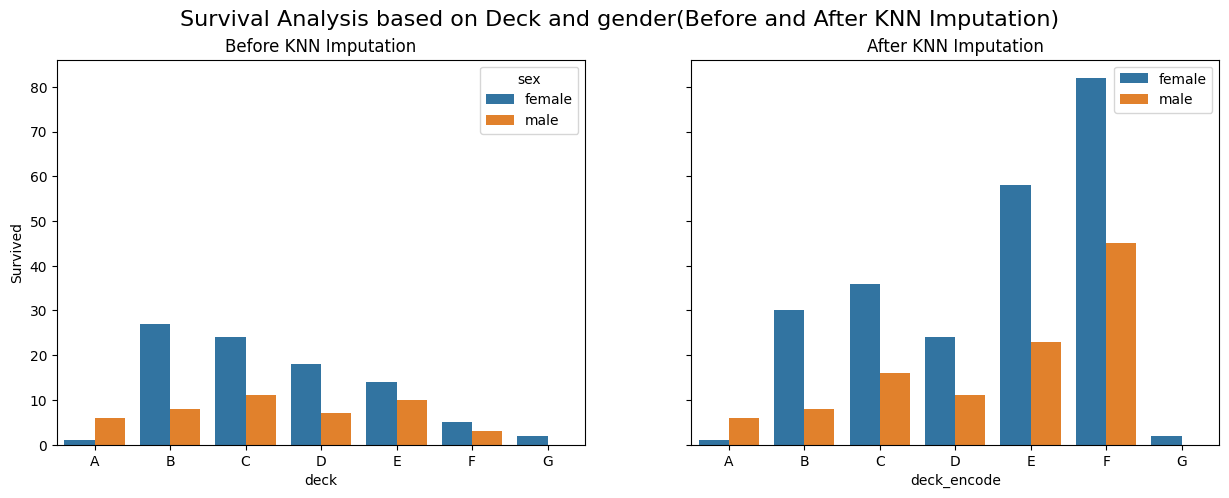

In [83]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x='deck',y='Survived',data=deck_gender,ax=ax[0],hue='sex')
#sns.barplot(x='deck_encode',y='Total_passenger',data=deck_gender_imputed,ax=ax[1],hue='sex')
sns.barplot(x='deck_encode',y='Survived',data=deck_gender_imputed,ax=ax[1],hue='sex')

fig.suptitle('Survival Analysis based on Deck and gender(Before and After KNN Imputation)', fontsize=16)
ax[0].set_title('Before KNN Imputation')
ax[1].set_title('After KNN Imputation')
plt.legend()
plt.show()

##<b>Before KNN imputation, survival analysis relied only on passengers with recorded deck values, mainly from upper-class cabins. This created a strong bias: female survival appeared almost absolute, with 100% survival on decks A, B, D, E, and F, 88.9% on C, and 50% on G. Male survival also seemed relatively high given the limited data, with 42.9% on A, 40% on B, 34.4% on C, and 46.7% on E. Since many missing values belonged to third-class passengers in lower decks, the pre-imputation results overstated survival chances, especially for men.<br>After KNN imputation, when deck values were estimated for all passengers, a more representative picture emerged. Female survival remained consistently higher but was now more realistic, ranging from 85-100% on upper decks (Ato D), 78.4% on E, 60.3% on F, and just 33.3% on G. Male survival dropped significantly compared to before, with 37.5% on A, 32% on B, 26.2% on C, 30.6% on D, 18.4% on E, and only 14.3% on F. This clearer distribution highlights the two dominant patterns: women had much higher chances of survival across every deck, and passengers on upper decks were far more likely to survive than those on lower decks.

##<b>Deck F had the highest number of passengers, with 450 in total. Out of these, only 127 survived. This explains why, in the bar chart for Deck F, it may look like most passengers survived, even though the survival rate was relatively low compared to the total count.

In [84]:
print('Total Passengers in each deck')
df.deck_encode.value_counts()

Total Passengers in each deck


,count
deck_encode,
F,450
E,199
C,100
D,64
B,55
A,17
G,6


#<b> Survival Analysis on deck and who(female/male/child)

In [85]:
deck_who_imputed=df.groupby(['deck_encode','who']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count')).reset_index()
deck_who_imputed

,deck_encode,who,Survived,Total_passenger
0,A,child,1,1
1,A,man,5,15
2,A,woman,1,1
3,B,child,3,3
4,B,man,7,24
5,B,woman,28,28
6,C,child,4,5
7,C,man,14,59
8,C,woman,34,36
9,D,man,11,36


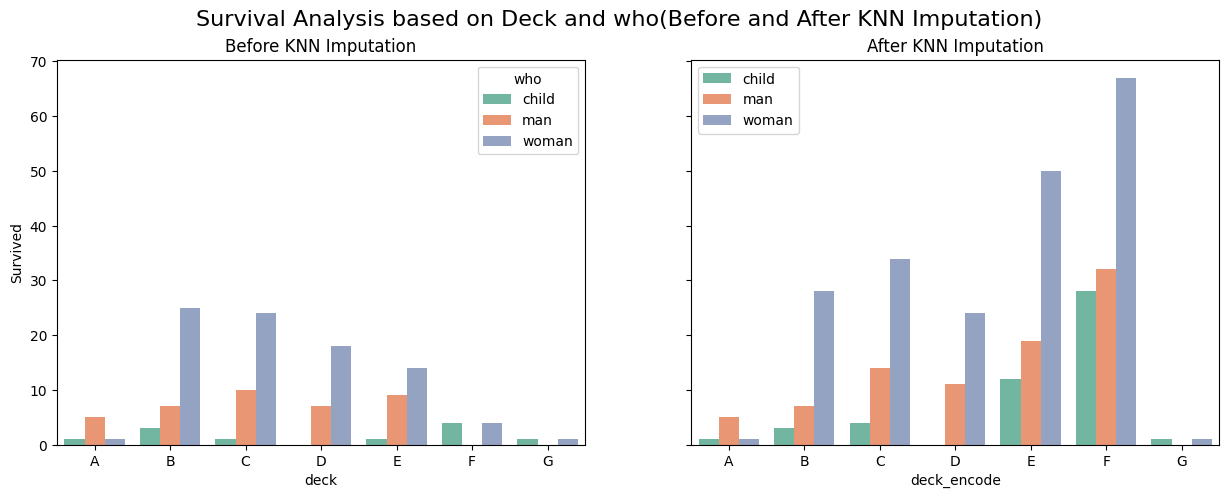

In [86]:
#heatmap before imputation
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x='deck',y='Survived',data=deck_who,ax=ax[0],hue='who',palette='Set2')
sns.barplot(x='deck_encode',y='Survived',data=deck_who_imputed,ax=ax[1],hue='who',palette='Set2')
ax[0].set_title('Before KNN Imputation')
ax[1].set_title('After KNN Imputation')
fig.suptitle('Survival Analysis based on Deck and who(Before and After KNN Imputation)', fontsize=16)
plt.legend()
plt.show()

##<b>Before imputation the deck feature had many missing values, so when survival counts were grouped by deck a large portion of passengers was excluded from the plot. After imputation some decks show higher survival counts which may look like the numbers increased. In reality the survival counts are unchanged and the difference comes only from handling missing values where imputation included passengers that were previously left out.

In [87]:
df[(df['who']=='child') & (df['deck_encode']=='D')]# No children in Deck D in both cases

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_encode


In [88]:
df[(df['who']=='man')&(df['deck_encode']=='G')]#no male passengers in G deck

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_encode


#<b> Survival Analysis on deck and adult_male

In [89]:
deck_adultmale_imputed=df.groupby(['deck_encode','adult_male']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count')).reset_index()
deck_adultmale_imputed

,deck_encode,adult_male,Survived,Total_passenger
0,A,False,2,2
1,A,True,5,15
2,B,False,31,31
3,B,True,7,24
4,C,False,38,41
5,C,True,14,59
6,D,False,24,28
7,D,True,11,36
8,E,False,62,79
9,E,True,19,120


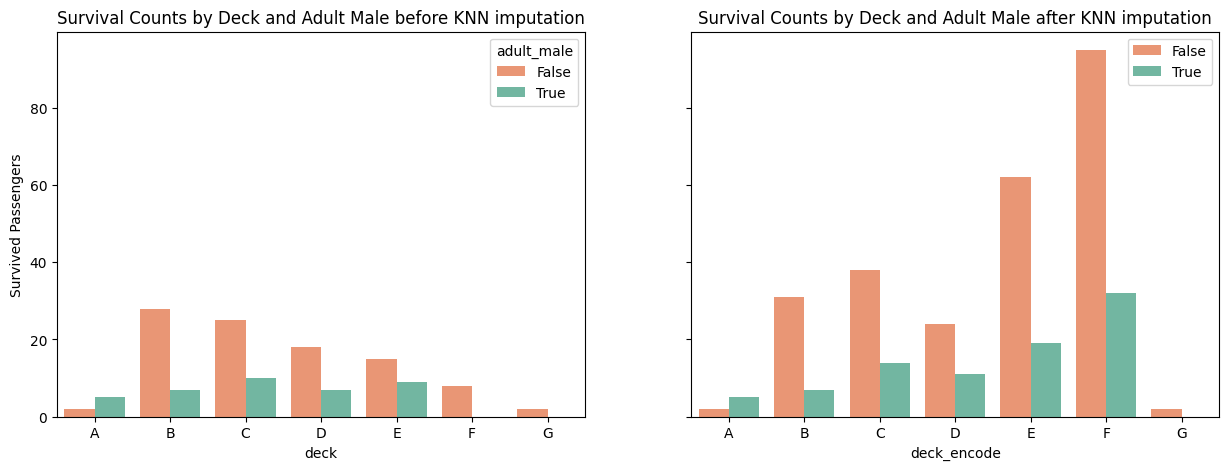

In [90]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(
    x='deck',
    y='Survived',
    hue='adult_male',
    data=deck_adultmale,
    palette=['#fc8d62','#66c2a5'],
   ax=ax[0])
sns.barplot(
    x='deck_encode',
    y='Survived',
    hue='adult_male',
    data=deck_adultmale_imputed,
    palette=['#fc8d62','#66c2a5'],
   ax=ax[1])

ax[0].set_ylabel("Survived Passengers")
ax[0].set_title("Survival Counts by Deck and Adult Male before KNN imputation")
ax[1].set_title("Survival Counts by Deck and Adult Male after KNN imputation")
plt.legend()
plt.show()

##<b>This plot shows only adult male survivors and does not include male children who survived.As an illustration, in Deck F, there were 45 male survivors in total. However, when considering only adult males, the number of survivors was 32. The difference of 13 is due to male children,boys who survived but were not adults. This shows that survival counts can vary depending on whether we include all males or only adults, which is important when interpreting the data.

##<b> Survival analysis on deck and passenger class

In [91]:
deck_class_imputed=df.groupby(['deck_encode','class']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count')).reset_index()## 0 means no second firstand third classes
deck_class_imputed

,deck_encode,class,Survived,Total_passenger
0,A,First,7,17
1,A,Second,0,0
2,A,Third,0,0
3,B,First,38,55
4,B,Second,0,0
5,B,Third,0,0
6,C,First,45,78
7,C,Second,7,22
8,C,Third,0,0
9,D,First,28,41


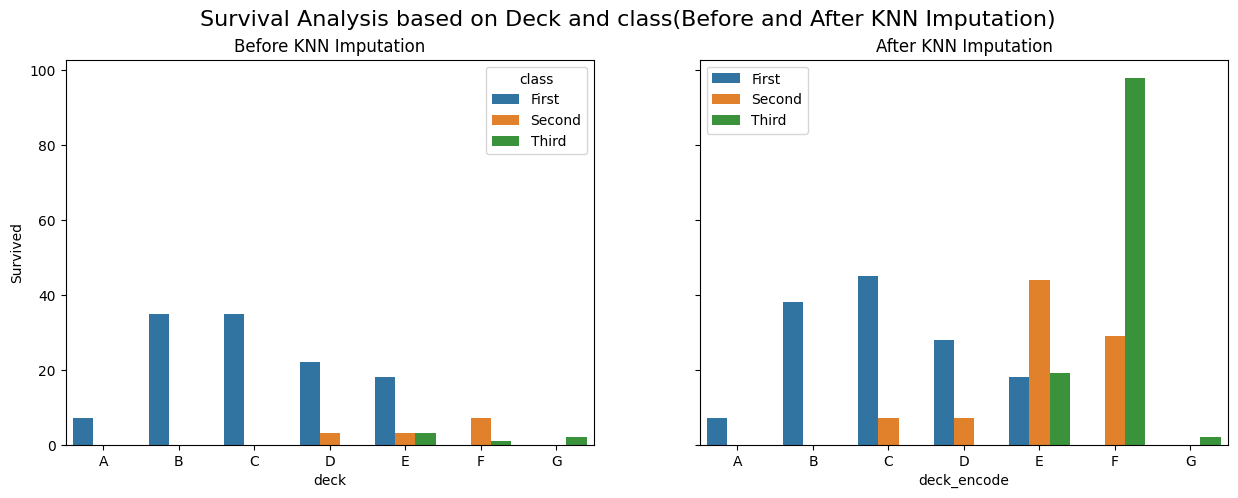

In [92]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x='deck',y='Survived',data=deck_class,ax=ax[0],hue='class')
sns.barplot(x='deck_encode',y='Survived',data=deck_class_imputed,ax=ax[1],hue='class')
fig.suptitle('Survival Analysis based on Deck and class(Before and After KNN Imputation)', fontsize=16)
ax[0].set_title('Before KNN Imputation')
ax[1].set_title('After KNN Imputation')
plt.legend()
plt.show()

##<b> Survival Analysis on deck and alone

In [93]:
deck_alone_imputed=df.groupby(['deck_encode','alone']).agg(Survived=pd.NamedAgg('survived',aggfunc='sum'),
                                       Total_passenger=pd.NamedAgg('deck_encode',aggfunc='count')).reset_index()
deck_alone_imputed

,deck_encode,alone,Survived,Total_passenger
0,A,False,3,3
1,A,True,4,14
2,B,False,21,25
3,B,True,17,30
4,C,False,31,59
5,C,True,21,41
6,D,False,22,42
7,D,True,13,22
8,E,False,35,57
9,E,True,46,142


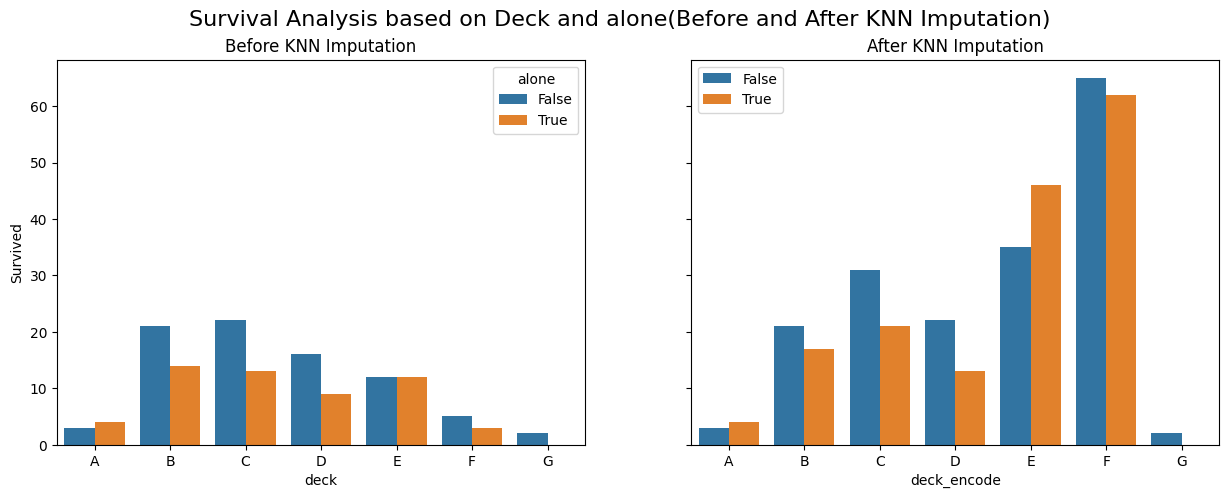

In [94]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.barplot(x='deck',y='Survived',data=deck_alone,ax=ax[0],hue='alone')
sns.barplot(x='deck_encode',y='Survived',data=deck_alone_imputed,ax=ax[1],hue='alone')
fig.suptitle('Survival Analysis based on Deck and alone(Before and After KNN Imputation)', fontsize=16)
ax[0].set_title('Before KNN Imputation')
ax[1].set_title('After KNN Imputation')
plt.legend()
plt.show()

##<b>Passengers who travelled with family might have included more children and female passengers, which could explain the slightly higher survival rates among them.

##<b>Analysis Based on Embarkation, Passenger Classes, and Deck

In [95]:
embark_class_deck=df.groupby(['embarked','class','deck_encode']).size().reset_index(name='Total_passenger')
embark_class_deck

,embarked,class,deck_encode,Total_passenger
0,C,First,A,9
1,C,First,B,25
2,C,First,C,33
3,C,First,D,13
4,C,First,E,5
...,...,...,...,...
58,S,Third,C,0
59,S,Third,D,7
60,S,Third,E,11
61,S,Third,F,329


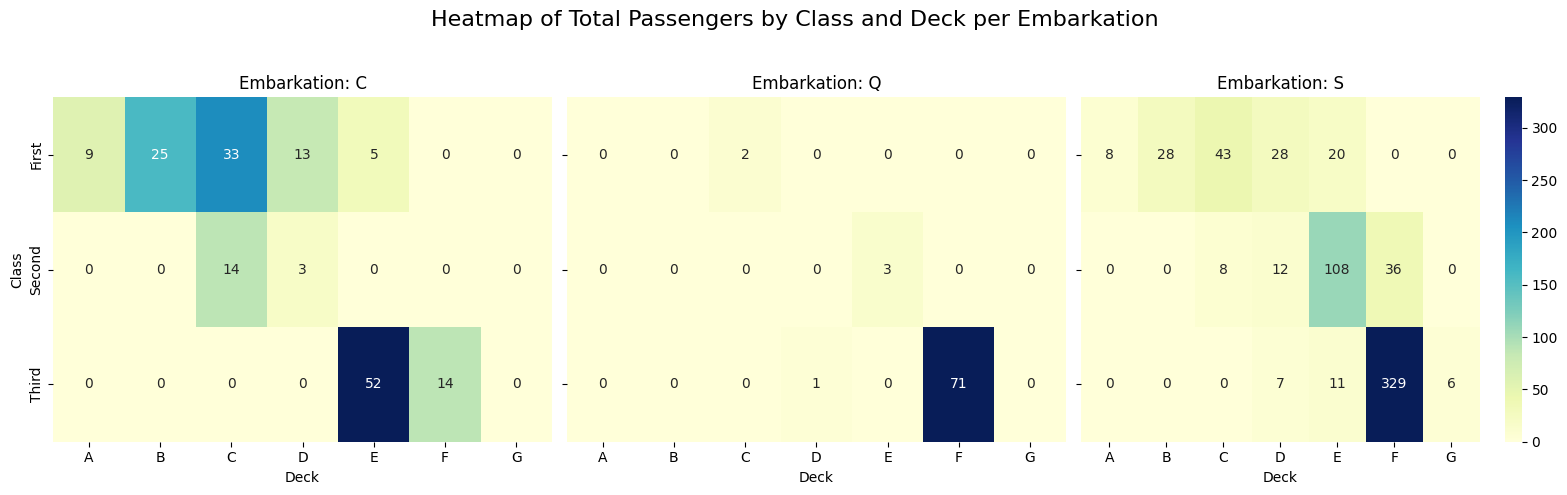

In [96]:
embarkations = embark_class_deck['embarked'].unique()

fig, axes = plt.subplots(1, len(embarkations), figsize=(16,5), sharey=True)

for i, embark in enumerate(embarkations):
    df_subset = embark_class_deck[embark_class_deck['embarked'] == embark]

    # Pivot: rows = class, columns = deck, values = total passengers
    pivot_table = df_subset.pivot(index='class', columns='deck_encode', values='Total_passenger')

    sns.heatmap(
        pivot_table,
        annot=True, fmt="d",
        cmap="YlGnBu",
        cbar=i==len(embarkations)-1,  # show colorbar only once
        ax=axes[i]
    )
    axes[i].set_title(f"Embarkation: {embark}")
    axes[i].set_xlabel("Deck")
    axes[i].set_ylabel("Class" if i==0 else "")

plt.suptitle("Heatmap of Total Passengers by Class and Deck per Embarkation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##<b> Analysis based on 'alone' and 'who'

---



In [97]:
df.alone.value_counts()

,count
alone,
True,537
False,354


In [98]:
alone_who=df.groupby(['alone','who']).agg(Survived_percent=pd.NamedAgg('survived',aggfunc=lambda x : round((x.mean()*100),2)),
                                       Total_passenger=pd.NamedAgg('alone',aggfunc='count')).reset_index()
alone_who

,alone,who,Survived_percent,Total_passenger
0,False,child,58.44,77
1,False,man,18.90,127
2,False,woman,73.33,150
3,True,child,66.67,6
4,True,man,15.61,410
5,True,woman,78.51,121


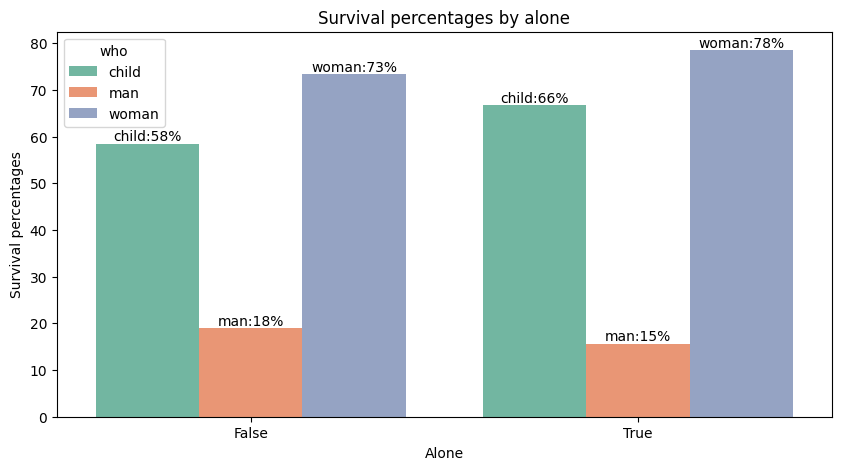

In [99]:
fig,ax=plt.subplots(figsize=(10,5))
colours= sns.color_palette("Set2", 3)
bars=sns.barplot(x='alone',y='Survived_percent',data=alone_who,hue='who',palette=colours)
for container,label in zip(bars.containers,['child','man','woman']):
  counts=[int(p.get_height()) for p in container]
  labels=[f'{label}:{count}%' for count in counts]
  bars.bar_label(container,labels=labels,label_type='edge')
plt.xlabel('Alone')
plt.ylabel('Survival percentages')
plt.title('Survival percentages by alone')
plt.show()

##<b>Among the 6 children who travelled alone, 4 survived (66.67%), while among the 77 accompanied children, 45 survived (58.44%). Although the survival rate for alone children appears higher, the very small number of alone children makes this percentage less reliable, whereas the larger accompanied group gives a more stable estimate of survival.